# 1. Pytorch Workflow Fundamentals Exercises

In [1]:
import torch
import matplotlib.pyplot as plt
from torch import nn

## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total. 
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

In [2]:
weight = 0.3
bias = 0.9

X = torch.arange(0, 1, 0.01).unsqueeze(dim=1) # adiciona uma nova dimensao -> (100, 1)
y = weight * X + bias

print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


In [3]:
train_split = int(len(X) * 0.8)

X_train = X[:train_split]
y_train = y[:train_split]

X_test = X[train_split:]
y_test = y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(80, 80, 20, 20)

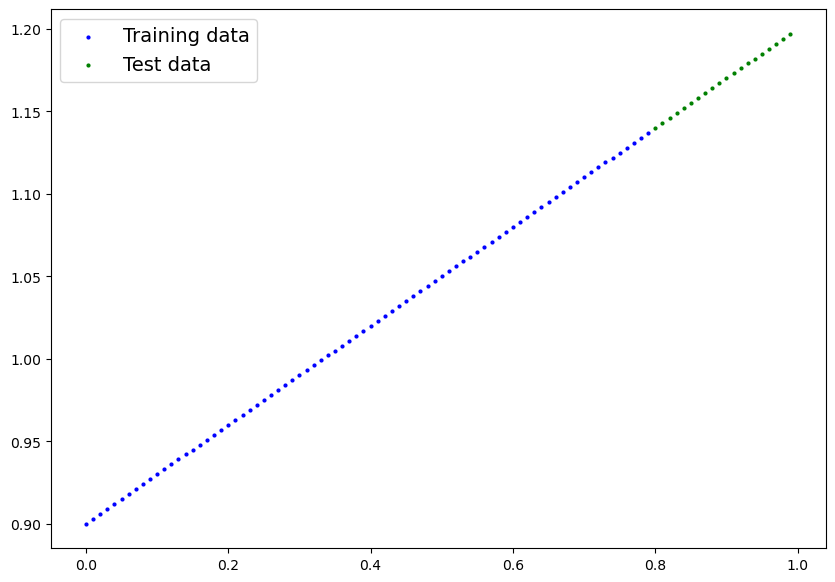

In [4]:
def plot_predictions(train_data = X_train,
                 train_labels = y_train,
                 test_data = X_test,
                 test_labels = y_test,
                 predictions = None):
  plt.figure(figsize = (10,7))
  plt.scatter(train_data,train_labels,c = 'b',s = 4,label = "Training data")
  plt.scatter(test_data,test_labels,c = 'g',s = 4,label = "Test data")

  if predictions is not None:
    plt.scatter(test_data,predictions,c = 'r',s = 4,label = "Predictions")
  plt.legend(prop = {"size" : 14})
  
plot_predictions()

## 2. Build a PyTorch model by subclassing `nn.Module`. 
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`. 
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1. 

In [5]:
class LinearRegressionModel(nn.Module):

    def __init__(self):
        super().__init__()

        self.weight = nn.Parameter(data=torch.randn(1, # valor aleatorio de distribuicao normal e criara um unico valor escalar
                                              requires_grad=True, # indica que sera treinado pelo pytorch entao o backpropagation calculara automaticamente o gradiente desse valor
                                              dtype=torch.float
                                              ))
    
        self.bias = nn.Parameter(data=torch.randn(1, 
                                                requires_grad=True,
                                                dtype=torch.float
                                                ))

    def forward(self, x):
        return self.weight * x + self.bias


## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively. 
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [6]:
torch.manual_seed(42)
model_1 = LinearRegressionModel()

In [7]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.01)

In [8]:
torch.manual_seed(42)

epochs = 300

for epoch in range(epochs):

  # modelo em modo de treinamento
  model_1.train()

  # 1. forward pass
  y_pred = model_1(X_train)

  # 2. loss
  loss = loss_fn(y_pred,y_train)

  # 3. zerar gradientes
  optimizer.zero_grad()

  # 4. backpropagation
  loss.backward()

  # 5. atualizar otimizador
  optimizer.step()

  ### performar teste a cada 20 epochs
  if epoch % 20 == 0:
    
    # modelo em modo avaliação e fazer inferencia
    model_1.eval()
    with torch.inference_mode():
      # 1. forward 
      y_preds = model_1(X_test)
      # 2. calcula test loss
      test_loss = loss_fn(y_preds,y_test)
      print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")


Epoch: 0 | Train loss: 0.757 | Test loss: 0.725
Epoch: 20 | Train loss: 0.525 | Test loss: 0.454
Epoch: 40 | Train loss: 0.294 | Test loss: 0.183
Epoch: 60 | Train loss: 0.077 | Test loss: 0.073
Epoch: 80 | Train loss: 0.053 | Test loss: 0.116
Epoch: 100 | Train loss: 0.046 | Test loss: 0.105
Epoch: 120 | Train loss: 0.039 | Test loss: 0.089
Epoch: 140 | Train loss: 0.032 | Test loss: 0.074
Epoch: 160 | Train loss: 0.025 | Test loss: 0.058
Epoch: 180 | Train loss: 0.018 | Test loss: 0.042
Epoch: 200 | Train loss: 0.011 | Test loss: 0.026
Epoch: 220 | Train loss: 0.004 | Test loss: 0.009
Epoch: 240 | Train loss: 0.004 | Test loss: 0.006
Epoch: 260 | Train loss: 0.004 | Test loss: 0.006
Epoch: 280 | Train loss: 0.004 | Test loss: 0.006


In [9]:
# fazer previsões
model_1.eval()

with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[1.1464],
        [1.1495],
        [1.1525],
        [1.1556],
        [1.1587],
        [1.1617],
        [1.1648],
        [1.1679],
        [1.1709],
        [1.1740],
        [1.1771],
        [1.1801],
        [1.1832],
        [1.1863],
        [1.1893],
        [1.1924],
        [1.1955],
        [1.1985],
        [1.2016],
        [1.2047]])

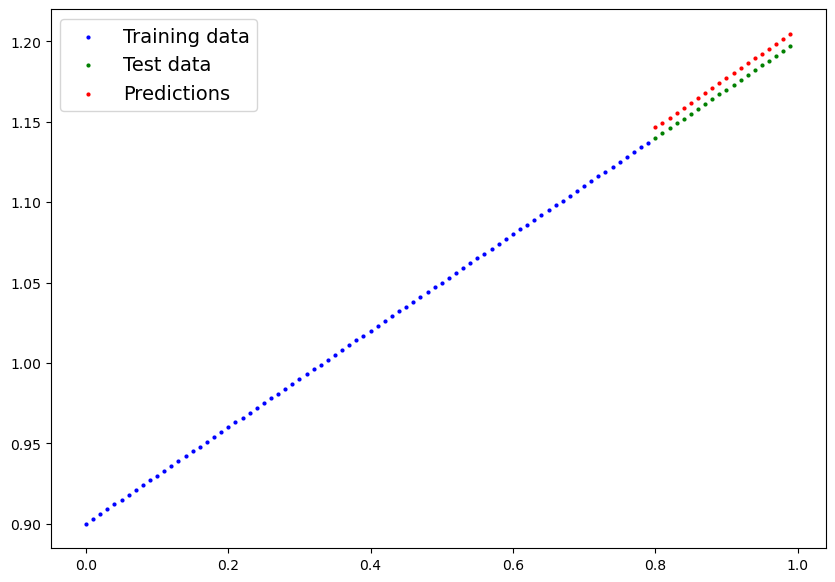

In [10]:
plot_predictions(predictions = y_preds)